# Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

abto_logo.png	     lighthouse.png	    square.png
alphabet.png	     logo_grayscale_0.png   star.jpg
boat.png	     logo_grayscale_9.png   star.png
cameraman.png	     peppers.png	    sudoku.png
chessboard_dark.png  plane.jpg		    sunrise.jpg
chessboard.png	     shapes_and_colors.jpg  thunderstorm.jpg
hieararchy.png	     square1.png
hierarchy.png	     square2.png


In [ ]:
!ls drive/MyDrive/practice_images

ls: cannot access 'drive/MyDrive/practice_images': No such file or directory


In [ ]:
%cd /content/drive/MyDrive/practice_images

/content/drive/MyDrive/practice_images


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load, Show and Save Images

## Loading images with `imread`

**`cv2.imread(	filename[, flags]	) -> 	retval`**

Where `flags` can be:


*   `IMREAD_COLOR` loads the image in the BGR 8-bit format. This is the **default** that is used here.
*   `IMREAD_UNCHANGED` loads the image as is (including the alpha channel if present)
*   `IMREAD_GRAYSCALE` loads the image as an intensity one
*   Other less commonly used values of [`cv2::ImreadModes`](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)



In [ ]:
logo_color = cv2.imread("abto_logo.png", cv2.IMREAD_COLOR)
logo_unchanged = cv2.imread("abto_logo.png", cv2.IMREAD_UNCHANGED)
logo_grayscale = cv2.imread("abto_logo.png", cv2.IMREAD_GRAYSCALE)

Image is loaded as a numpy array, usually of `uint8` type. Note that `IMREAD_UNCHANGED` also allows working with 16-bit images, which are stored as `uint16`

In [ ]:
logo_color.dtype

dtype('uint8')

In [ ]:
logo_color.shape

(254, 933, 3)

In [ ]:
logo_unchanged.shape

(254, 933, 4)

In [ ]:
logo_grayscale.shape

(254, 933)

## Showing images with matplotlib

### Showing RGB(A) images

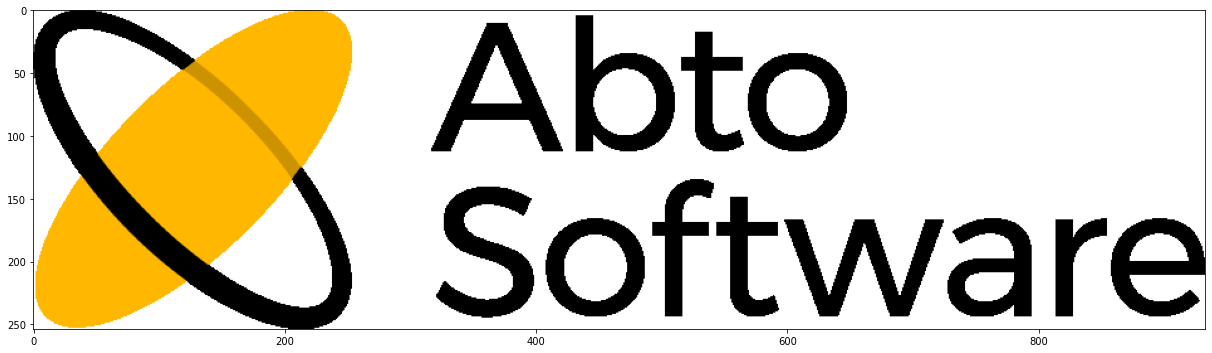

In [ ]:
fig, ax = plt.subplots(figsize=(21, 21))
ax.imshow(logo_color)

OpenCV uses BGR format, while matplotlib's `imshow` expects RGB image. So to see correct colors we need to convert image from BGR to RGB. For that `cv2.cvtColor` function can be used.

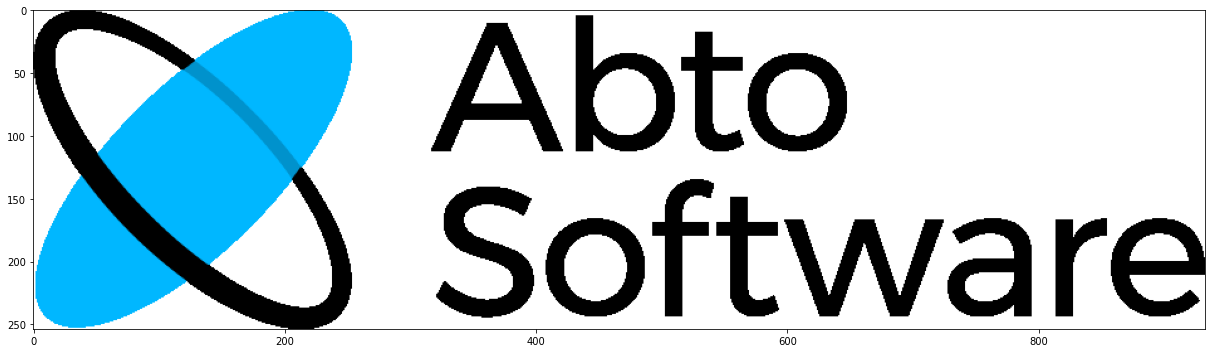

In [ ]:
logo_color_rgb = cv2.cvtColor(logo_color, cv2.COLOR_BGR2RGB)
# logo_color_rgb = logo_color[:, :, ::-1]

fig, ax = plt.subplots(figsize=(21, 21))
ax.imshow(logo_color_rgb)

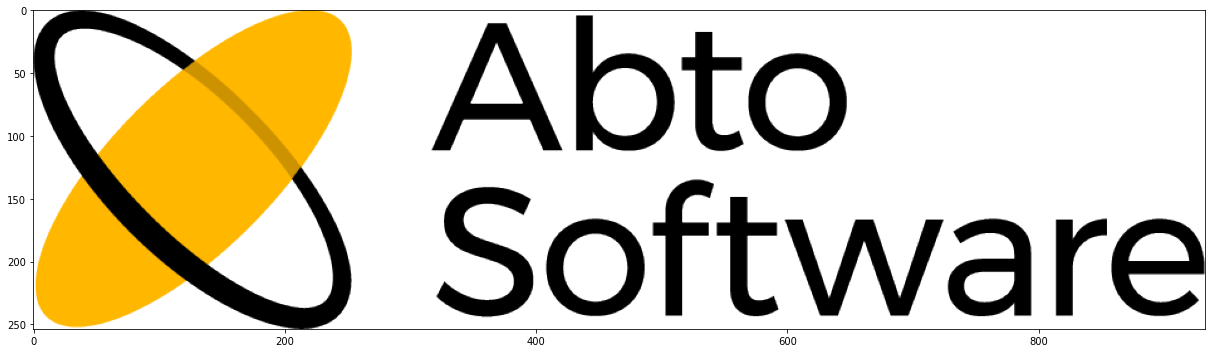

In [ ]:
fig, ax = plt.subplots(figsize=(21, 21))
ax.imshow(logo_unchanged)

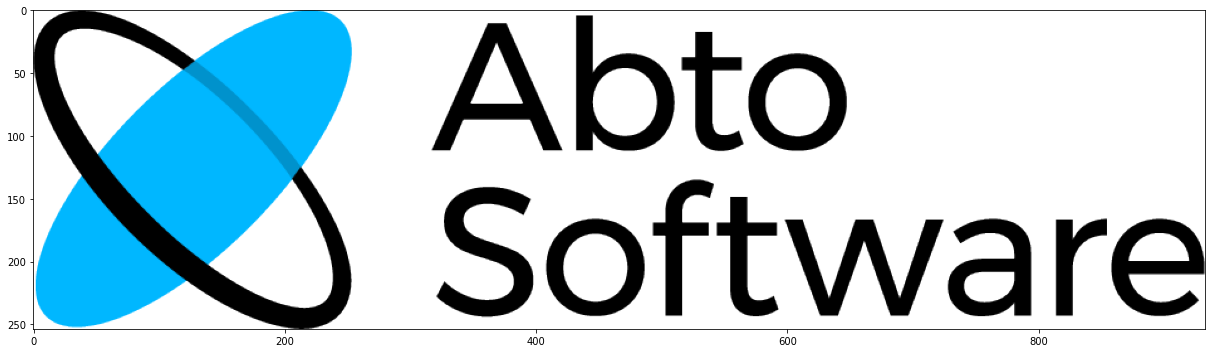

In [ ]:
logo_unchanged_rgb = cv2.cvtColor(logo_unchanged, cv2.COLOR_BGRA2RGBA)
fig, ax = plt.subplots(figsize=(21, 21))
ax.imshow(logo_unchanged_rgb)

### Showing gray images

For grayscale images `imshow` assigns specific color to each value according to specified colormap. Sometimes it can be a little confusing. List of available colormaps can be found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

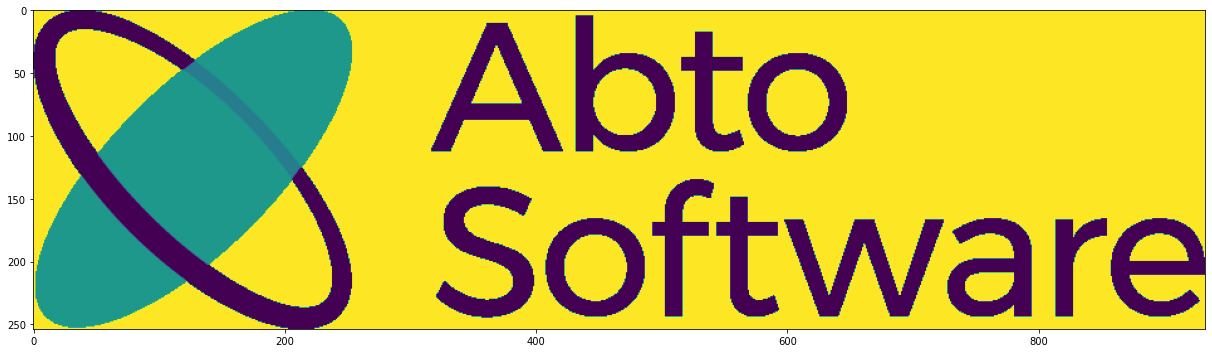

In [ ]:
fig, ax = plt.subplots(figsize=(21, 21))
ax.imshow(logo_grayscale)

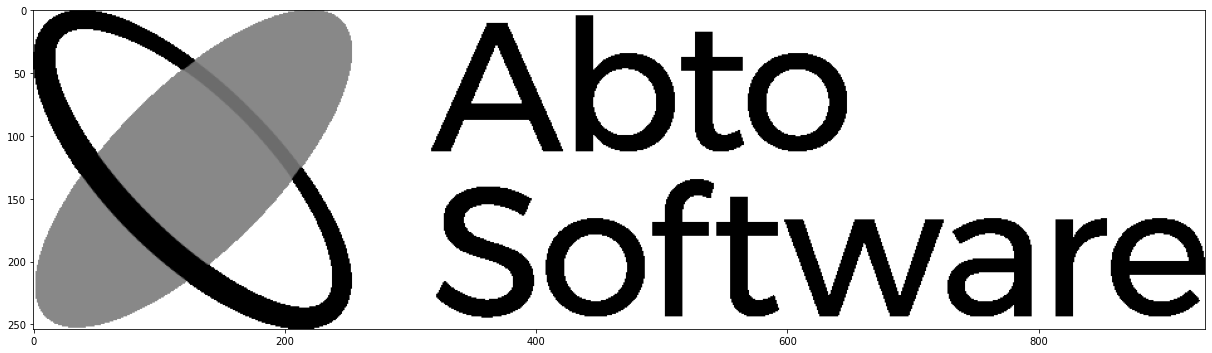

In [ ]:
fig, ax = plt.subplots(figsize=(21, 21))
ax.imshow(logo_grayscale, cmap="gray")

By default `imshow` maps range `[min(img), max(img)]` to given range of colors. This is why when visually comparing images it's important to make sure that they have the same ranges set with `vmin` and `vmax` function parameters.

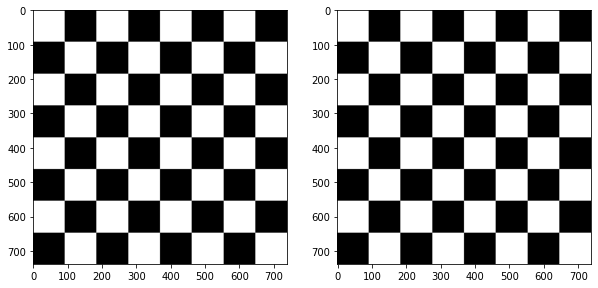

In [ ]:
chessboard = cv2.imread("chessboard.png", cv2.IMREAD_GRAYSCALE)
chessboard_dark = cv2.imread("chessboard_dark.png", cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(chessboard, cmap="gray")
ax[1].imshow(chessboard_dark, cmap="gray")

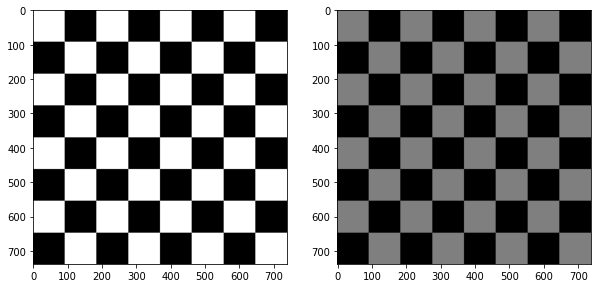

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(chessboard, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(chessboard_dark, cmap="gray", vmin=0, vmax=255)

## Saving images with `imwrite`

**`cv2.imwrite(	filename, img[, params]	) -> 	retval`**

Where params are format-specific parameters encoded as pairs (paramId_1, paramValue_1, paramId_2, paramValue_2, ... .) see [`cv2::ImwriteFlags`](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac). For example let's try different png compression levels.

In [ ]:
cv2.imwrite("logo_grayscale_0.png", logo_grayscale, [cv2.IMWRITE_PNG_COMPRESSION, 0])
cv2.imwrite("logo_grayscale_9.png", logo_grayscale, [cv2.IMWRITE_PNG_COMPRESSION, 9])

True

In [ ]:
os.path.getsize("logo_grayscale_0.png")

237675

In [ ]:
os.path.getsize("logo_grayscale_9.png")

6617

More info on PNG compression can be found [here](https://medium.com/@duhroach/how-png-works-f1174e3cc7b7)

# Basic Image Manipulations

## Changing colorspace

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two, which are most widely used ones: BGR ↔ Gray and BGR ↔ HSV.

For color conversion, we use the function cv.cvtColor(input_image, flag) where flag determines the type of conversion.

For BGR → Gray conversion, we use the flag cv.COLOR_BGR2GRAY. Similarly for BGR → HSV, we use the flag cv.COLOR_BGR2HSV. To get other flags, just run following commands in your Python terminal: 

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

Text(0.5, 1.0, 'HSV')

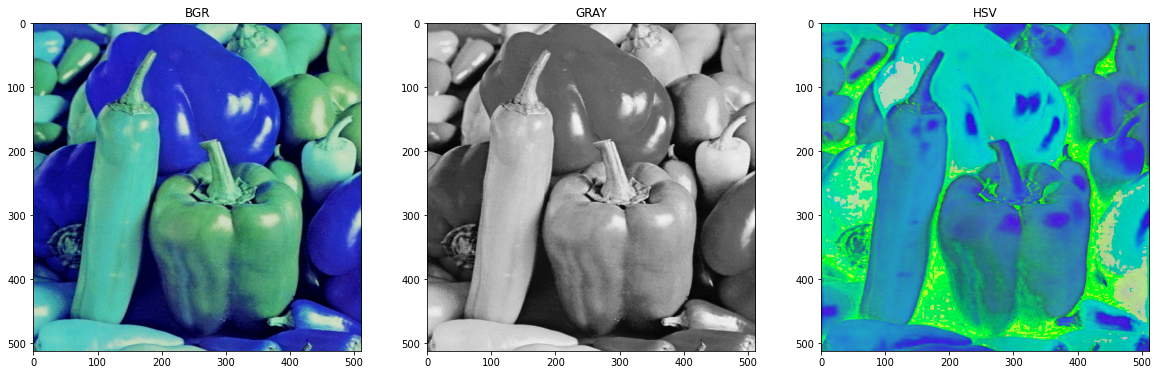

In [ ]:
peppers = cv2.imread("peppers.png")

peppers_gray = cv2.cvtColor(peppers, cv2.COLOR_BGR2GRAY)
peppers_hsv = cv2.cvtColor(peppers, cv2.COLOR_BGR2HSV)

fig, ax = plt.subplots(ncols=3, figsize=(20, 20))
ax[0].imshow(peppers)
ax[0].set_title("BGR")
ax[1].imshow(peppers_gray, cmap="gray")
ax[1].set_title("GRAY")
ax[2].imshow(peppers_hsv)
ax[2].set_title("HSV")

**NOTE.** For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]. Different software use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

In [ ]:
print(peppers_hsv[:, :, 0].min(), peppers_hsv[:, :, 0].max())

0 179


## Accessing and modifying pixel values

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned. 

In [ ]:
peppers = cv2.imread("peppers.png")

peppers[100, 100]

array([ 29,  24, 183], dtype=uint8)

You can modify the pixel values the same way. 

In [ ]:
peppers[100, 100] = [255, 255, 255]
peppers[100, 100]

array([255, 255, 255], dtype=uint8)

## Cropping the image

To crop the image we can use python slicing syntax

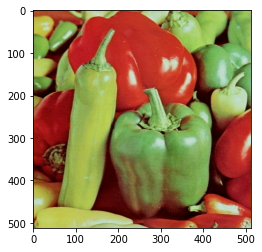

In [ ]:
peppers = cv2.imread("peppers.png")[:, :, ::-1]

fig, ax = plt.subplots()
ax.imshow(peppers)

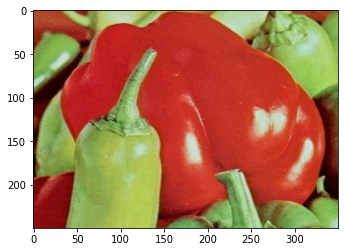

In [ ]:
fig, ax = plt.subplots()
ax.imshow(peppers[:250, 50:400])

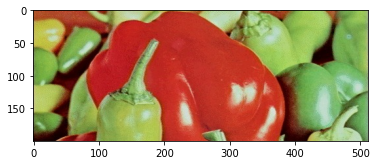

In [ ]:
fig, ax = plt.subplots()
ax.imshow(peppers[:200, :])

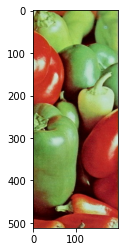

In [ ]:
fig, ax = plt.subplots()
ax.imshow(peppers[:, -200:])

Cropped image is returned by reference, so modifying it will modify the original one.

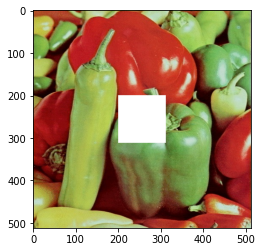

In [ ]:
peppers[200:-200, 200:-200] = [255, 255, 255]
fig, ax = plt.subplots()
ax.imshow(peppers)

## Selecting pixels by color

NumPy allows using binary masks in indexing operator to select particular pixels. For example, let's remove dark pixels from the image

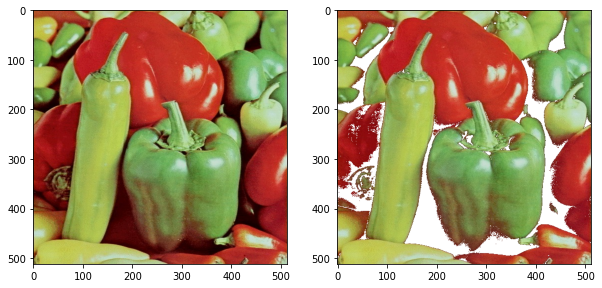

In [ ]:
peppers = cv2.imread("peppers.png")[:, :, ::-1]
peppers_modified = peppers.copy()
peppers_modified[np.mean(peppers, axis=2) < 50] = 255

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(peppers)
ax[1].imshow(peppers_modified)

**Task.** Try selecting red peppers

In [ ]:
### Write your code here

## Flipping the image

**`	cv.flip(	src, flipCode[, dst]	) -> 	dst`**

**`flipCode`** is a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes. 

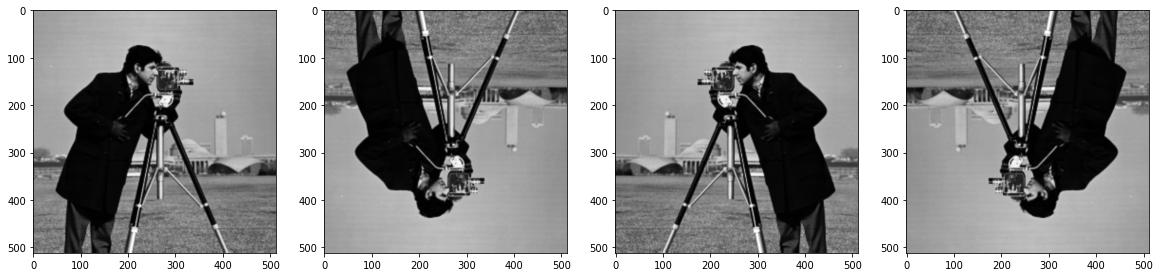

In [ ]:
cameraman = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)
cameraman_flip_x = cv2.flip(cameraman, 0)
cameraman_flip_y = cv2.flip(cameraman, 1)
cameraman_flip_xy = cv2.flip(cameraman, -1)


fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
ax[0].imshow(cameraman, cmap="gray")
ax[1].imshow(cameraman_flip_x, cmap="gray")
ax[2].imshow(cameraman_flip_y, cmap="gray")
ax[3].imshow(cameraman_flip_xy, cmap="gray")

**Task.** Any other ways to flip an image?

In [ ]:
# Write your code here

## Rotating the image

**`	cv.rotate(	src, rotateCode[, dst]	) -> 	dst`**

**`rotateCode`** can be `ROTATE_90_CLOCKWISE`, `ROTATE_180`, or `ROTATE_90_COUNTERCLOCKWISE`

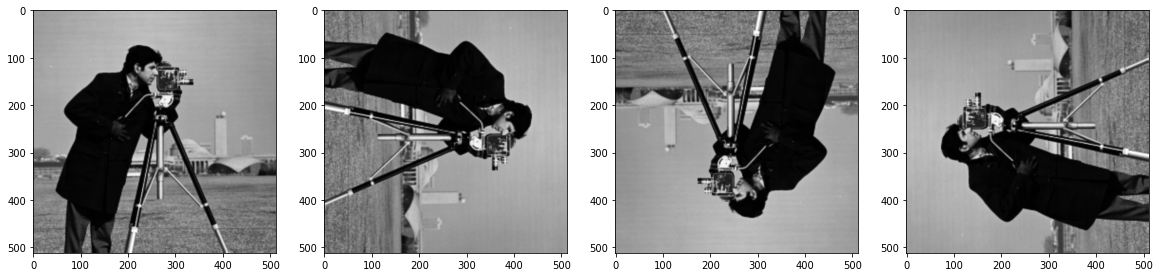

In [ ]:
cameraman = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)
cameraman_90 = cv2.rotate(cameraman, cv2.ROTATE_90_CLOCKWISE)
cameraman_180 = cv2.rotate(cameraman, cv2.ROTATE_180)
cameraman_270 = cv2.rotate(cameraman, cv2.ROTATE_90_COUNTERCLOCKWISE)


fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
ax[0].imshow(cameraman, cmap="gray")
ax[1].imshow(cameraman_90, cmap="gray")
ax[2].imshow(cameraman_180, cmap="gray")
ax[3].imshow(cameraman_270, cmap="gray")

## Resizing the image

**`	cv.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	) -> 	dst `**

**`interpolation`** - interpolation method, see [InterpolationFlags](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

Most popular interpolation methods are:
- `INTER_NEAREST` - best for artificial images
- `INTER_LINEAR` - default method, fast and provides reasonable quality
- `INTER_CUBIC` - best for upsampling
- `INTER_AREA` - best for downsampling

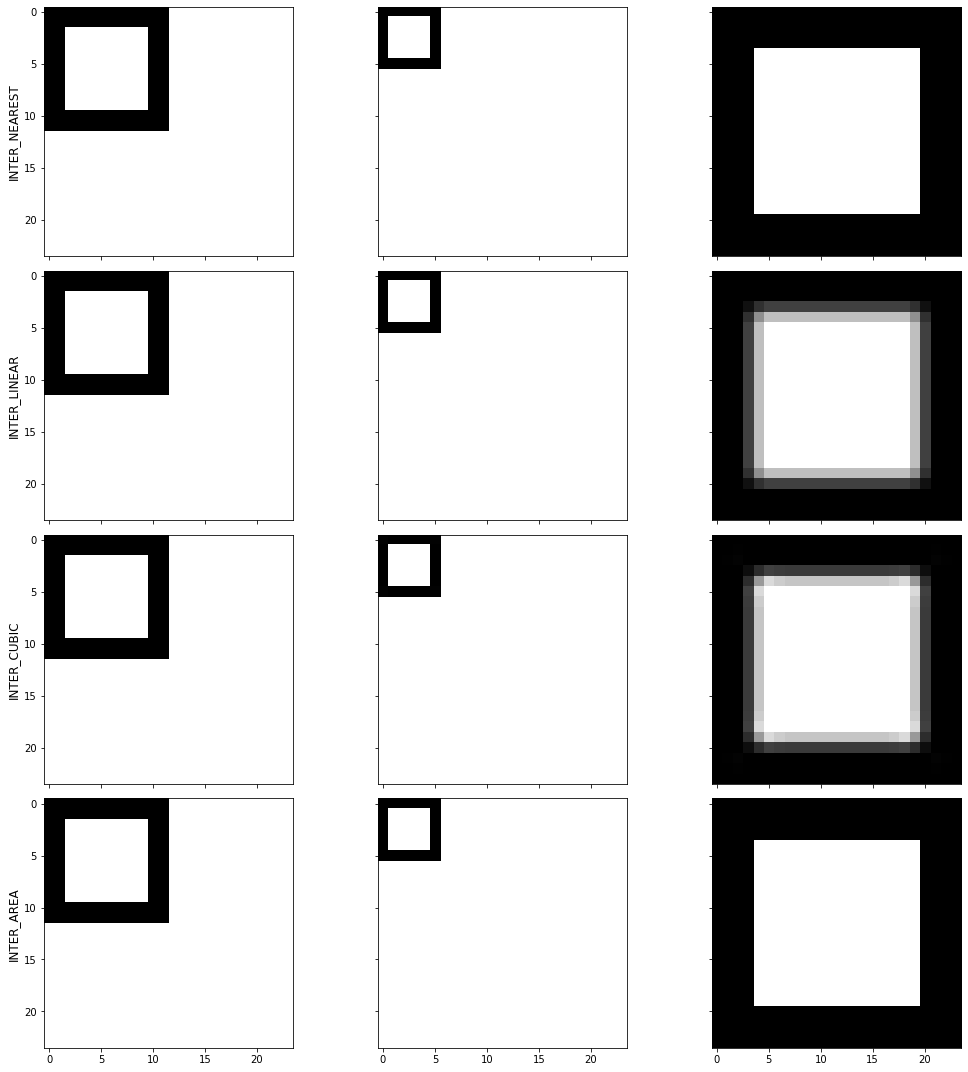

In [ ]:
interpolations = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
interpolation_names = ["INTER_NEAREST", "INTER_LINEAR", "INTER_CUBIC", "INTER_AREA"]

img = np.zeros((12, 12), dtype=np.uint8)
img[2:10, 2:10] = 255

fig, ax = plt.subplots(ncols=3, nrows=len(interpolations), figsize=(15, 15), sharex=True, sharey=True)

for i in range(len(interpolations)):
    ax[i, 0].set_ylabel(interpolation_names[i], size="large")

for i in range(len(interpolations)):
    img_smaller = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=interpolations[i])
    img_larger = cv2.resize(img, None, fx=2, fy=2, interpolation=interpolations[i])

    ax[i, 0].imshow(img, cmap="gray")
    ax[i, 1].imshow(img_smaller, cmap="gray")
    ax[i, 2].imshow(img_larger, cmap="gray")

fig.tight_layout()

# Image Statistics

## Min, Max, Mean, STD

In [ ]:
img = cv2.imread("peppers.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

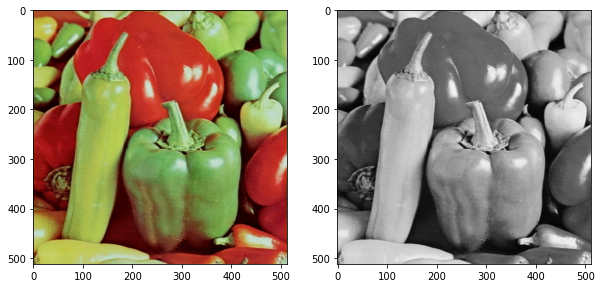

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img[:, :, ::-1])
ax[1].imshow(img_gray, cmap="gray")

In [ ]:
min = img_gray.min()
max = img_gray.max()
minLoc = np.unravel_index(img_gray.argmin(), img_gray.shape)
maxLoc = np.unravel_index(img_gray.argmax(), img_gray.shape)
mean = img_gray.mean()
std = img_gray.std()

print(f"Min = {min} {minLoc}")
print(f"Max = {max} {maxLoc}")
print(f"Mean = {mean:.4f}")
print(f"STD = {std:.4f}")

Min = 1 (33, 458)
Max = 229 (150, 364)
Mean = 116.1469
STD = 52.9815


In [ ]:
min, max, minLoc, maxLoc = cv2.minMaxLoc(img_gray)
mean, std = cv2.meanStdDev(img_gray)

print(f"Min = {min} {minLoc}")
print(f"Max = {max} {maxLoc}")
print(f"Mean = {mean[0, 0]:.4f}")
print(f"STD = {std[0, 0]:.4f}")

Min = 1.0 (458, 33)
Max = 229.0 (364, 150)
Mean = 116.1469
STD = 52.9815


In [ ]:
mean, _ = cv2.meanStdDev(img)
print(mean)

mean = img.mean(axis=(0, 1))
print(mean)

[[ 63.63130188]
 [112.43013382]
 [143.49808121]]
[ 63.63130188 112.43013382 143.49808121]


## Histogram

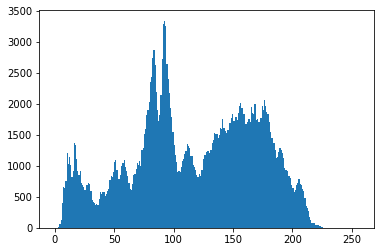

In [ ]:
fig, ax = plt.subplots()
ax.hist(img_gray.ravel(), 256, (0, 256));

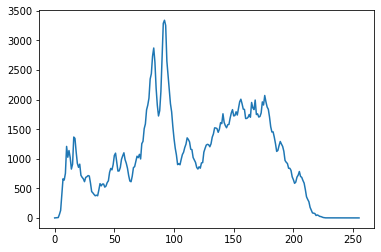

In [ ]:
histr = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
fig, ax = plt.subplots()
ax.plot(histr)

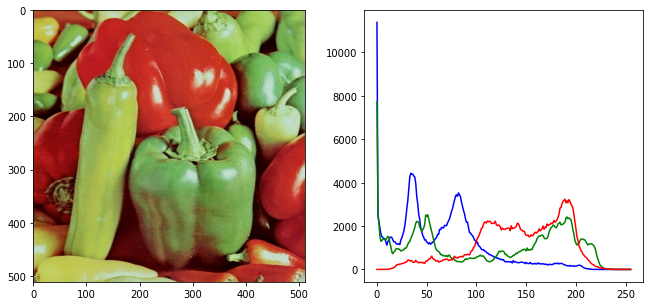

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(11, 5))
ax[0].imshow(img[:, :, ::-1])
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    ax[1].plot(histr, color = col)


# Arithmetic Operations on Images

## Different ways to perform arithmetic operations on images

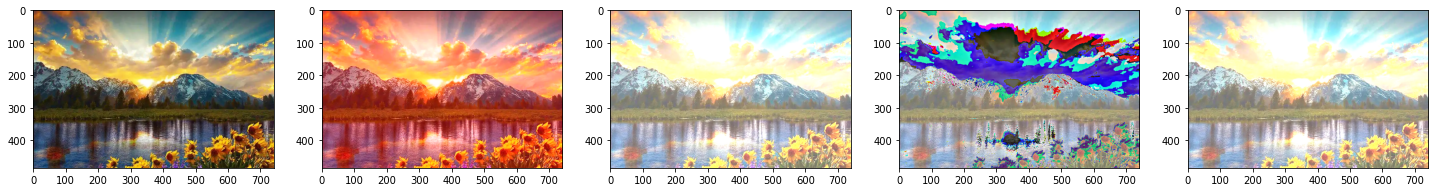

In [ ]:
value = 100

img = cv2.imread("sunrise.jpg")[:, :, ::-1]
add_1 = cv2.add(img, value)
add_2 = cv2.add(img, (value, value, value, 0))
add_3 = img + value
add_4 = np.clip(img.astype(np.int32) + value, 0, 255).astype(np.uint8)

fig, ax = plt.subplots(ncols=5, figsize=(25, 10))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(add_1, cmap="gray")
ax[2].imshow(add_2, cmap="gray")
ax[3].imshow(add_3, cmap="gray")
ax[4].imshow(add_4, cmap="gray")

How can we make sure that add_2 and add_4 are really the same?

In [ ]:
### Write your code here

OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [ ]:
x = np.uint8([250])
y = np.uint8([10])

cv2.add(x,y)    # 250+10 = 260 => 255

array([[255]], dtype=uint8)

In [ ]:
x+y             # 250+10 = 260 % 256 = 4

array([4], dtype=uint8)

In the Python OpenCV bindings, if you want to pass something to a OpenCV function that should be interpreted as a scalar, you should use a tuple with 4 elements. The size is important, that's what allows the wrapper code to recognise it as such. This corresponds to the C++ type `cv::Scalar`, which also holds 4 values. Only the values that are needed are used (corresponding to the channel depth of the other operand), the rest is ignored.

In [ ]:
x = np.zeros((2, 2, 3), dtype=np.uint8)

cv2.add(x, 5)               # adds 5 only to the first channel

array([[[5, 0, 0],
        [5, 0, 0]],

       [[5, 0, 0],
        [5, 0, 0]]], dtype=uint8)

In [ ]:
cv2.add(x, (5, 5, 5, 0))    # adds 5 to all channels

array([[[5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5]]], dtype=uint8)

## Operations with scalars

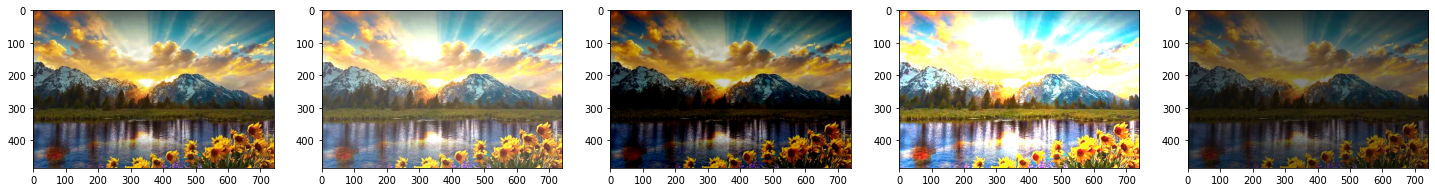

In [ ]:
value1 = 50
value2 = 2

img = cv2.imread("sunrise.jpg")[:, :, ::-1]
img_add = cv2.add(img, (value1, value1, value1, 0))
img_sub = cv2.subtract(img, (value1, value1, value1, 0))
img_mul = cv2.multiply(img, (value2, value2, value2, 0))
img_div = cv2.divide(img, (value2, value2, value2, 0))

fig, ax = plt.subplots(ncols=5, figsize=(25, 10))
ax[0].imshow(img)
ax[1].imshow(img_add)
ax[2].imshow(img_sub)
ax[3].imshow(img_mul)
ax[4].imshow(img_div)

**`	cv2.convertScaleAbs(	src[, dst[, alpha[, beta]]]	) -> 	dst`**

`cv2.convertScaleAbs` is a useful function for modifying image brightness and contrast. On each element of the input array, the function convertScaleAbs performs three operations sequentially: scaling, taking an absolute value, conversion to an unsigned 8-bit type: 

```
dst(I)=saturate_cast<uchar>(|src(I)∗alpha+beta|)
```

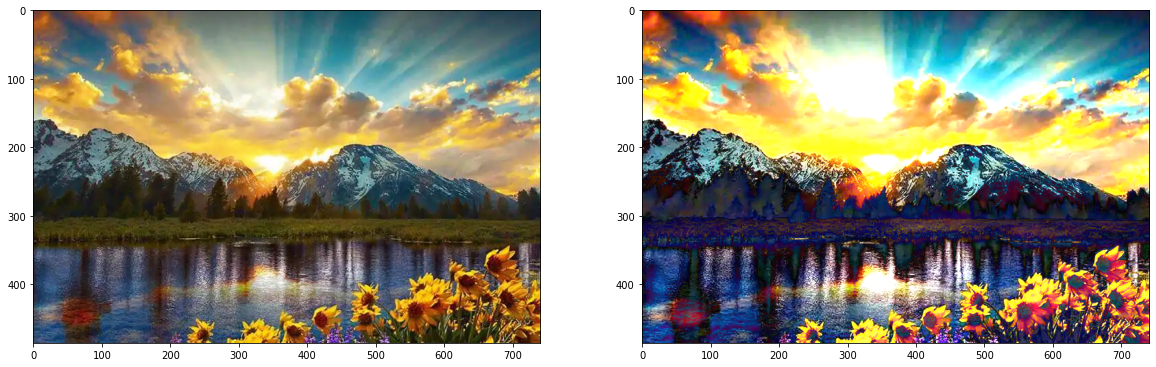

In [ ]:
contrast = 2
brightness = -100

result = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].imshow(img)
ax[1].imshow(result)

## Operations with two images

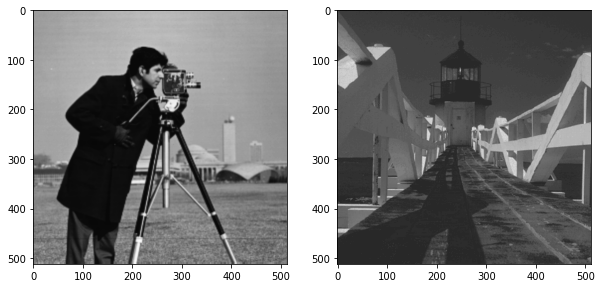

In [ ]:
img1 = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("lighthouse.png", cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img1, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(img2, cmap="gray", vmin=0, vmax=255)

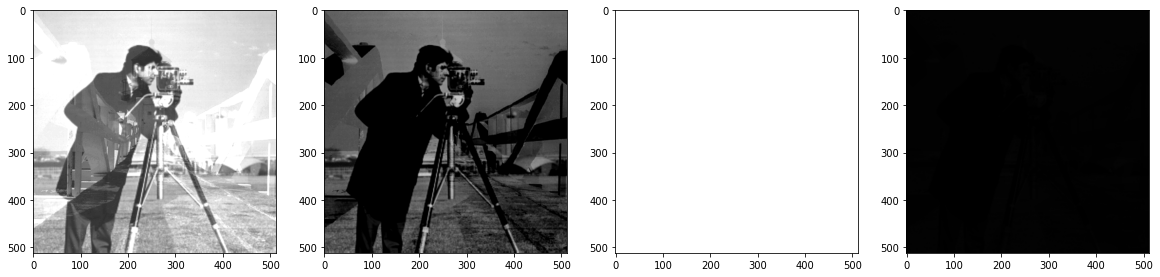

In [ ]:
add = cv2.add(img1, img2)
sub = cv2.subtract(img1, img2)
mul = cv2.multiply(img1, img2)
div = cv2.divide(img1, img2)

fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
ax[0].imshow(add, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(sub, cmap="gray", vmin=0, vmax=255)
ax[2].imshow(mul, cmap="gray", vmin=0, vmax=255)
ax[3].imshow(div, cmap="gray", vmin=0, vmax=255)

## Image blending

**`	cv.addWeighted(	src1, alpha, src2, beta, gamma[, dst[, dtype]]	) -> 	dst`**

The function addWeighted calculates the weighted sum of two arrays as follows: 

```
dst = src1*alpha + src2*beta + gamma
```

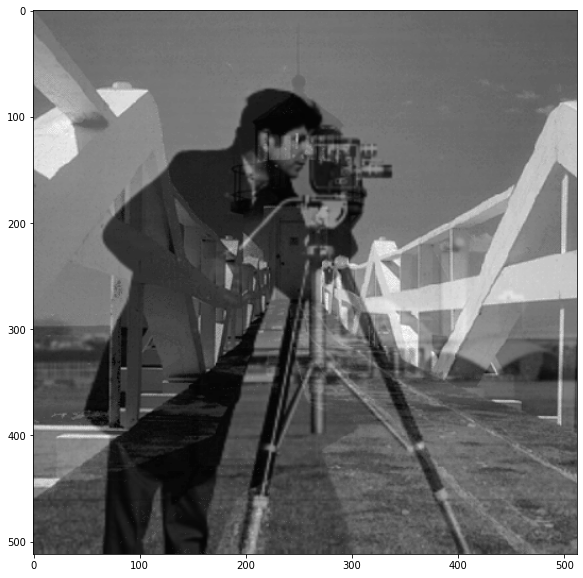

In [ ]:
img1 = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("lighthouse.png", cv2.IMREAD_GRAYSCALE)

alpha = 0.4
beta = 1 - alpha
gamma = 0
result = cv2.addWeighted(img1, alpha, img2, beta, gamma)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(result, cmap="gray")

**Task.** Try blending the following two images. (Note, they have different size)

In [ ]:
plane = cv2.imread("plane.jpg")[:, :, ::-1]
thunderstorm = cv2.imread("thunderstorm.jpg")[:, :, ::-1]

In [ ]:
### Write your code here

## Bitwise operations

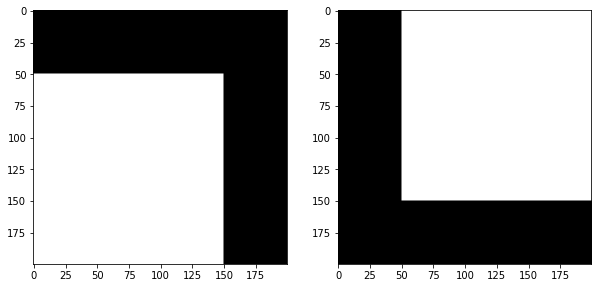

In [ ]:
img1 = cv2.imread("square1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("square2.png", cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img1, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(img2, cmap="gray", vmin=0, vmax=255)

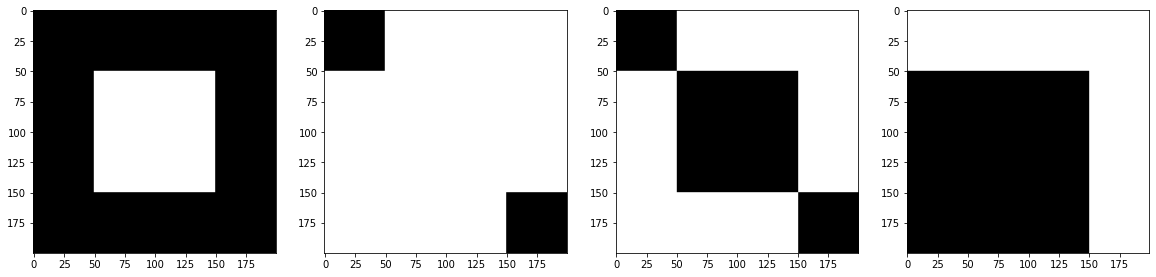

In [ ]:
bitwise_and = cv2.bitwise_and(img1, img2)
bitwise_or = cv2.bitwise_or(img1, img2)
bitwise_xor = cv2.bitwise_xor(img1, img2)
bitwise_not = cv2.bitwise_not(img1)

fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
ax[0].imshow(bitwise_and, cmap="gray")
ax[1].imshow(bitwise_or, cmap="gray")
ax[2].imshow(bitwise_xor, cmap="gray")
ax[3].imshow(bitwise_not, cmap="gray")

# Basic Drawing

Let's focus on basic drawing function. _OpenCV_ provides several function for drawing:

 - __`cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → img`__
 - __`cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) → img`__
 - __`cv2.ellipse(img, box, color[, thickness[, lineType]]) → img`__
 - __`cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → img`__
 - __`cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]]) → 	img`__
 - __`cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → img`__
 - __`cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) → img`__
 
For more detailed information [see this tutorial](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)


Drawing functions expect coordinates in (horizontal, vertical) format starting from the upper left corner. So if we found some object in our image matrix with coordinates **(row, col)** and we want to draw circle around it, we need to specify its center as **(col, row)**.

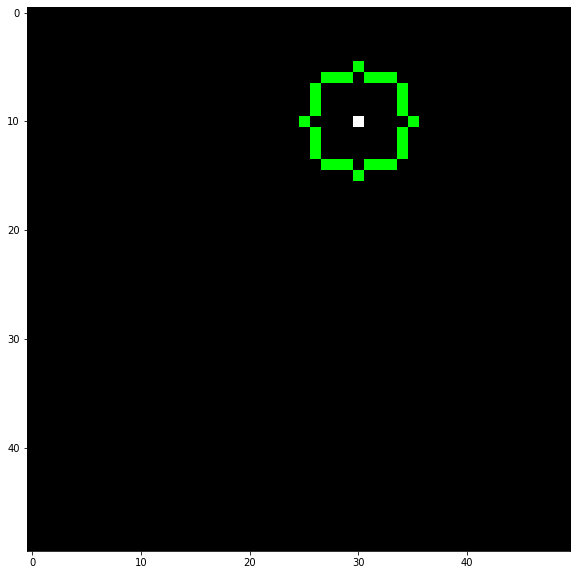

In [ ]:
img = np.zeros([50, 50, 3], dtype=np.uint8)

row, col = (10, 30)
img[row, col] = [255, 255, 255]
img = cv2.circle(img, (col, row), 5, (0, 255, 0), 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

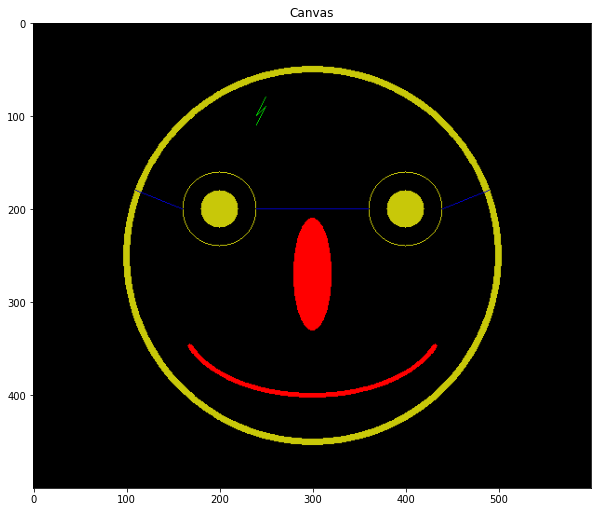

In [ ]:
canvas = np.zeros([500, 600, 3], dtype=np.uint8)

# Face circle and eyes
canvas = cv2.circle(canvas, (200, 200), 20, (9, 200, 200), cv2.FILLED)
canvas = cv2.circle(canvas, (400, 200), 20, (9, 200, 200), cv2.FILLED)
canvas = cv2.circle(canvas, (300, 250), 200, (9, 200, 200), 5)

# Glasses
canvas = cv2.circle(canvas, (200, 200), 40, (9, 200, 200), 1)
canvas = cv2.circle(canvas, (400, 200), 40, (9, 200, 200), 1)
canvas = cv2.line(canvas, (240, 200), (360, 200), (200, 0, 0), 1)
canvas = cv2.line(canvas, (160, 200), (110, 180), (200, 0, 0), 1)
canvas = cv2.line(canvas, (440, 200), (490, 180), (200, 0, 0), 1)

# Nose and mouse
canvas = cv2.ellipse(canvas, (300, 270), (20, 60), 0, 0, 360, (0, 0, 255), cv2.FILLED)
canvas = cv2.ellipse(canvas, (300, 320), (140, 80), 0, 20, 160, (0, 0, 255), 3)

# Zip
canvas = cv2.line(canvas, (250, 80), (240, 100), (0, 200, 0), 1)
canvas = cv2.line(canvas, (240, 100), (250, 90), (0, 200, 0), 1)
canvas = cv2.line(canvas, (250, 90), (240, 110), (0, 200, 0), 1)


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
ax.imshow(canvas[:, :, ::-1])
ax.set_title('Canvas');

**Task.** Try drawing something, in example Abto or OpenCV logo

In [ ]:
### Write your code here